In [1]:
from ants import get_ants_data, image_read, resample_image, get_mask, registration, apply_transforms, from_numpy, image_write
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os



In [10]:
def registration(fixed_image_path, moving_image_path, segmentated_image_path, type="Rigid"):
    # Read the fixed and moving images
    fixed_image = image_read("../../temp_images/segmented_FLAIR.nii.gz")
    moving_image = image_read("../../temp_images/T1.nii.gz")

    # Read the segmentated image, if not exists, make it equal to moving image
    if(segmentated_image_path != ""):
        moving_image_segmented = image_read( "../../temp_images/segmented_T1.nii.gz")
    else:
        moving_image_segmented = moving_image

    # Perform rigid registration
    transform = registration(fixed=fixed_image, moving=moving_image, type_of_transform=type)

    # Apply K-means clustering to the moving image
    # moving_image_nib = nib.load(os.path.join("temp_images", moving_image_path)).get_fdata()
    # moving_image_segmented = k_means(moving_image_nib, 5)
    # save_image(moving_image_segmented, moving_image_path)
    # moving_image_segmented = image_read(os.path.join("temp_images", moving_image_path))

    # Apply the transformation to the moving image
    registered_image = apply_transforms(fixed=fixed_image, moving=moving_image_segmented, transformlist=transform['fwdtransforms'])

    # Convert the registered image to a NumPy array
    registered_array = registered_image.numpy()

    return registered_array

    # # # Save the registered image
    # image_write(registered_image, "registered_image.nii.gz")

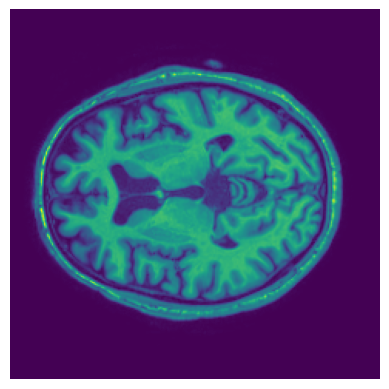

In [3]:
# Read the fixed and moving images
fixed_image = image_read("../../images/1/FLAIR.nii.gz")
moving_image = image_read("../../temp_images/T1.nii.gz")

# Perform rigid registration
transform = registration(fixed=fixed_image, moving=moving_image, type_of_transform='Rigid')

# Apply the transformation to the moving image
registered_image = apply_transforms(fixed=fixed_image, moving=moving_image, transformlist=transform['fwdtransforms'])

# Convert the registered image to a NumPy array
registered_array = registered_image.numpy()

# Plot the registered image using plt.imshow()
plt.imshow(registered_array[:,:,20])
plt.axis('off')
plt.show()

# # Save the registered image
image_write(registered_image, "registered_image.nii.gz")

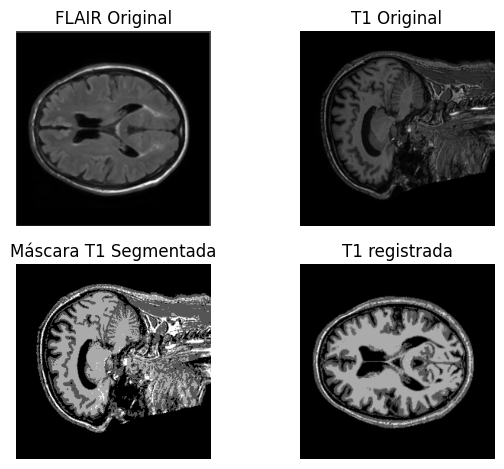

In [47]:
image_data_FLAIR = nib.load("../../temp_images/FLAIR.nii.gz").get_fdata()
# image_data_FLAIR = nib.load("../../images/1/FLAIR.nii.gz").get_fdata()
image_data_T1 = nib.load("../../temp_images/T1.nii.gz").get_fdata()
image_data_T1_segmented = nib.load("../../temp_images/segmented_T1.nii.gz").get_fdata()
image_data_T1_registered = nib.load("../../temp_images/registered_T1.nii.gz").get_fdata()

fig, axs = plt.subplots(2, 2)

# axs[0, 0].plot(x1, y1)



# Plot the registered image using plt.imshow()
axs[0,0].set_title("FLAIR Original")
axs[0,0].set_xlim([0, image_data_FLAIR.shape[0]])
axs[0,0].set_ylim([0, image_data_FLAIR.shape[1]])

axs[0,0].imshow(image_data_FLAIR[:,:,23], cmap="gray")

axs[0,1].set_title("T1 Original")
axs[0,1].set_xlim([0, image_data_T1.shape[0]])
axs[0,1].set_ylim([0, image_data_T1.shape[1]])
axs[0,1].imshow(image_data_T1[:,:,83], cmap="gray")

axs[1,0].set_title("Máscara T1 Segmentada")
axs[1,0].set_xlim([0, image_data_T1_segmented.shape[0]])
axs[1,0].set_ylim([0, image_data_T1_segmented.shape[1]])
axs[1,0].imshow(image_data_T1_segmented[:,:,83], cmap="gray")

axs[1,1].set_title("T1 registrada")
axs[1,1].set_xlim([0, image_data_T1_registered.shape[0]])
axs[1,1].set_ylim([0, image_data_T1_registered.shape[1]])
axs[1,1].imshow(image_data_T1_registered[:,:,23], cmap="gray")

# axs[0,0].axis('off')
# axs[0,1].axis('off')
# axs[1,0].axis('off')
# axs[1,1].axis('off')
# Invert the y-axis
# Añade el texto de la leyenda

plt.tight_layout()
# plt.show()

